In [ ]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
import matplotlib.pyplot as plt
import numpy as np
import keras

In [ ]:
model = VGG16()

553467096/553467096 [==============================] - 12s 0us/step


In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# **Cargar imagenes y probabilidades**

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/2/24/Guitar_1.jpg

--2023-05-22 22:54:55--  https://upload.wikimedia.org/wikipedia/commons/2/24/Guitar_1.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 292923 (286K) [image/jpeg]
Saving to: ‘Guitar_1.jpg’

Guitar_1.jpg        100%[===================>] 286.06K  --.-KB/s    in 0.07s   

2023-05-22 22:54:55 (3.87 MB/s) - ‘Guitar_1.jpg’ saved [292923/292923]



In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Volkswagen_Beetle_at_the_theatre_in_Seattle.jpg/640px-Volkswagen_Beetle_at_the_theatre_in_Seattle.jpg

--2023-05-22 22:54:55--  https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Volkswagen_Beetle_at_the_theatre_in_Seattle.jpg/640px-Volkswagen_Beetle_at_the_theatre_in_Seattle.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96400 (94K) [image/jpeg]
Saving to: ‘640px-Volkswagen_Beetle_at_the_theatre_in_Seattle.jpg’

640px-Volkswagen_Be 100%[===================>]  94.14K  --.-KB/s    in 0.04s   

2023-05-22 22:54:56 (2.44 MB/s) - ‘640px-Volkswagen_Beetle_at_the_theatre_in_Seattle.jpg’ saved [96400/96400]



In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/Rottweiler-Head.2.jpg/640px-Rottweiler-Head.2.jpg

--2023-05-22 22:54:56--  https://upload.wikimedia.org/wikipedia/commons/thumb/a/a4/Rottweiler-Head.2.jpg/640px-Rottweiler-Head.2.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 91352 (89K) [image/jpeg]
Saving to: ‘640px-Rottweiler-Head.2.jpg’

640px-Rottweiler-He 100%[===================>]  89.21K  --.-KB/s    in 0.04s   

2023-05-22 22:54:56 (2.39 MB/s) - ‘640px-Rottweiler-Head.2.jpg’ saved [91352/91352]



In [ ]:
img = keras.utils.image_utils.load_img("/content/Guitar_1.jpg",
                                       target_size=(224, 224),
                                       keep_aspect_ratio=True)

In [ ]:
img2 = keras.utils.image_utils.load_img("/content/640px-Rottweiler-Head.2.jpg",
                                        target_size=(224, 224),
                                        keep_aspect_ratio=True)


In [ ]:
img3 = keras.utils.image_utils.load_img("/content/640px-Volkswagen_Beetle_at_the_theatre_in_Seattle.jpg",
                                        target_size=(224, 224),
                                        keep_aspect_ratio=True)

In [ ]:
img_array = keras.utils.img_to_array(img)
img_array2 = keras.utils.img_to_array(img2)
img_array3 = keras.utils.img_to_array(img3)

In [ ]:
img_array = img_array.reshape(1, 224, 224, 3)
img_array2 = img_array2.reshape(1, 224, 224, 3)
img_array3 = img_array3.reshape(1, 224, 224, 3)

In [ ]:
img_array = preprocess_input(img_array)
img_array2 = preprocess_input(img_array2)
img_array3 = preprocess_input(img_array3)


In [ ]:
# Clasificar las imágenes
preds = model.predict(img_array)
preds2 = model.predict(img_array2)
preds3 = model.predict(img_array3)

1/1 [==============================] - 1s 792ms/step


In [ ]:
print("Imagen 1 ",preprocess_input(img_array).min())


Imagen 1  -233.558


In [ ]:
print("Imagen 2 ",preprocess_input(img_array2).min())


Imagen 2  -233.558


In [ ]:
print("Imagen 3 ",preprocess_input(img_array3).min())

Imagen 3  -233.558


In [ ]:
np.argmax(model.predict(img_array))


1/1 [==============================] - 1s 548ms/step


402

In [ ]:
np.argmax(model.predict(img_array2))


1/1 [==============================] - 1s 550ms/step


234

In [ ]:
np.argmax(model.predict(img_array3))

1/1 [==============================] - 1s 556ms/step


468

In [ ]:
np.max(model.predict(img_array))


1/1 [==============================] - 1s 559ms/step


0.9986603

In [ ]:
np.max(model.predict(img_array2))


1/1 [==============================] - 1s 554ms/step


1.0

In [ ]:
np.max(model.predict(img_array3))

1/1 [==============================] - 1s 541ms/step


0.644838

In [ ]:
# Decodificar las predicciones
decoded_preds = decode_predictions(preds, top=5)
decoded_preds2 = decode_predictions(preds2, top=5)
decoded_preds3 = decode_predictions(preds3, top=5)

35363/35363 [==============================] - 0s 0us/step


In [ ]:
print("Predicciones para la imagen de la guitarra:")
print(decoded_preds)
print("\nPredicciones para la imagen del rottweiler:")
print(decoded_preds2)
print("\nPredicciones para la imagen del escarabajo:")
print(decoded_preds3)


Predicciones para la imagen de la guitarra:
[[('n02676566', 'acoustic_guitar', 0.99453694), ('n03272010', 'electric_guitar', 0.0027954536), ('n02787622', 'banjo', 0.0015216022), ('n03929660', 'pick', 0.0005791284), ('n04536866', 'violin', 0.00027907777)]]

Predicciones para la imagen del rottweiler:
[[('n02106550', 'Rottweiler', 0.99999964), ('n02107908', 'Appenzeller', 2.694079e-07), ('n02107142', 'Doberman', 5.8812756e-08), ('n02099712', 'Labrador_retriever', 4.1577174e-08), ('n02089078', 'black-and-tan_coonhound', 2.5659451e-08)]]

Predicciones para la imagen del escarabajo:
[[('n02930766', 'cab', 0.49879697), ('n04037443', 'racer', 0.12214841), ('n04285008', 'sports_car', 0.07965187), ('n04461696', 'tow_truck', 0.022501223), ('n02814533', 'beach_wagon', 0.021926332)]]


In [ ]:
layer_1 = model.layers[1]
layer_1.weights[0][0][:, :, 0].shape

TensorShape([3, 3])

# **Imagen 1**

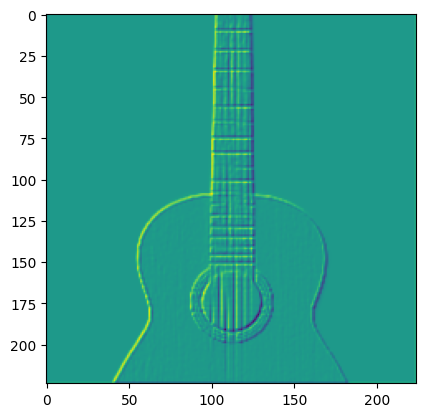

In [ ]:
plt.imshow(layer_1.convolution_op(inputs=img_array, kernel=layer_1.get_weights()[0])[0][:, :, 0])


1/1 [==============================] - 0s 62ms/step


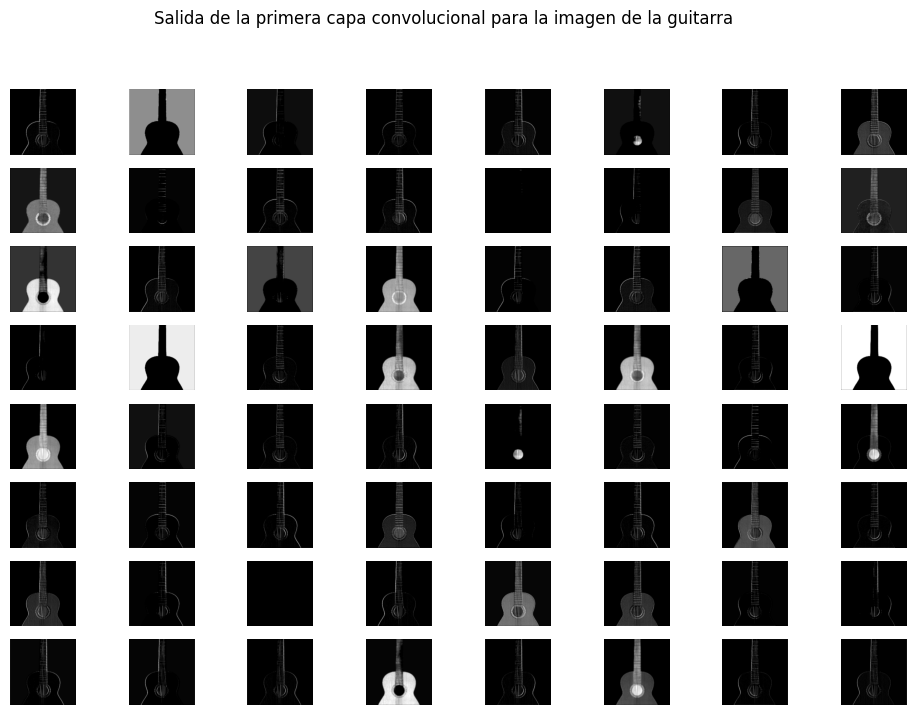

In [ ]:
# Visualizar la salida de la primera capa convolucional para la imagen de la guitarra
layer1_output = model.layers[1].output
activation_model1 = keras.models.Model(inputs=model.input, outputs=layer1_output)
activations1 = activation_model1.predict(img_array)


plt.figure(figsize=(12, 8))
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.imshow(activations1[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.suptitle("Salida de la primera capa convolucional para la imagen de la guitarra")
plt.show()


1/1 [==============================] - 0s 123ms/step


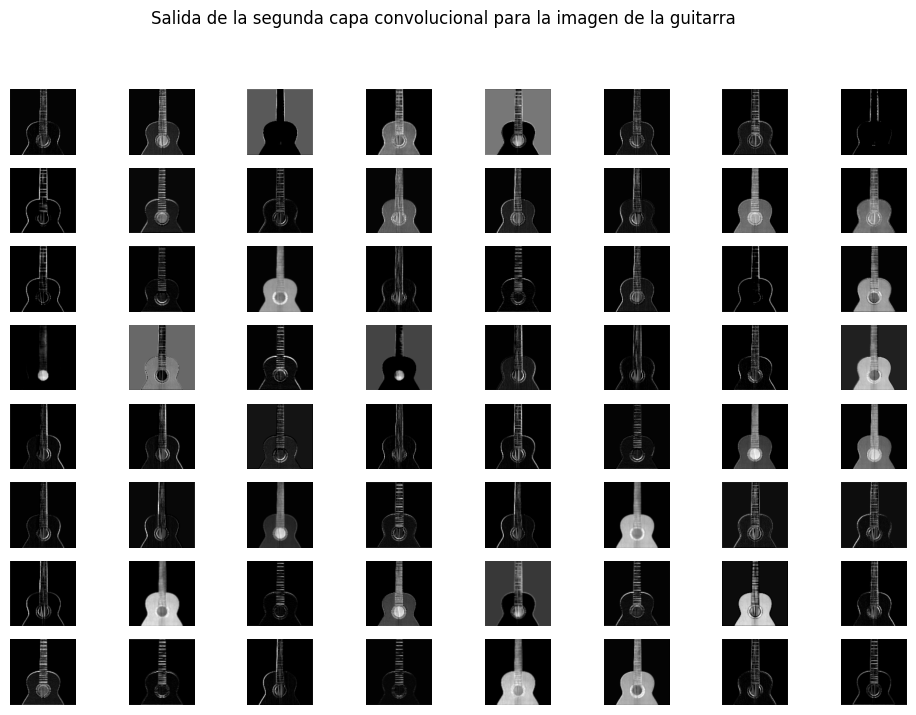

In [ ]:
# Visualizar la salida de la segunda capa convolucional para la imagen de la guitarra
layer2_output = model.layers[3].output
activation_model2 = keras.models.Model(inputs=model.input, outputs=layer2_output)
activations2 = activation_model2.predict(img_array)

plt.figure(figsize=(12, 8))
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.imshow(activations2[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.suptitle("Salida de la segunda capa convolucional para la imagen de la guitarra")
plt.show()


1/1 [==============================] - 0s 160ms/step


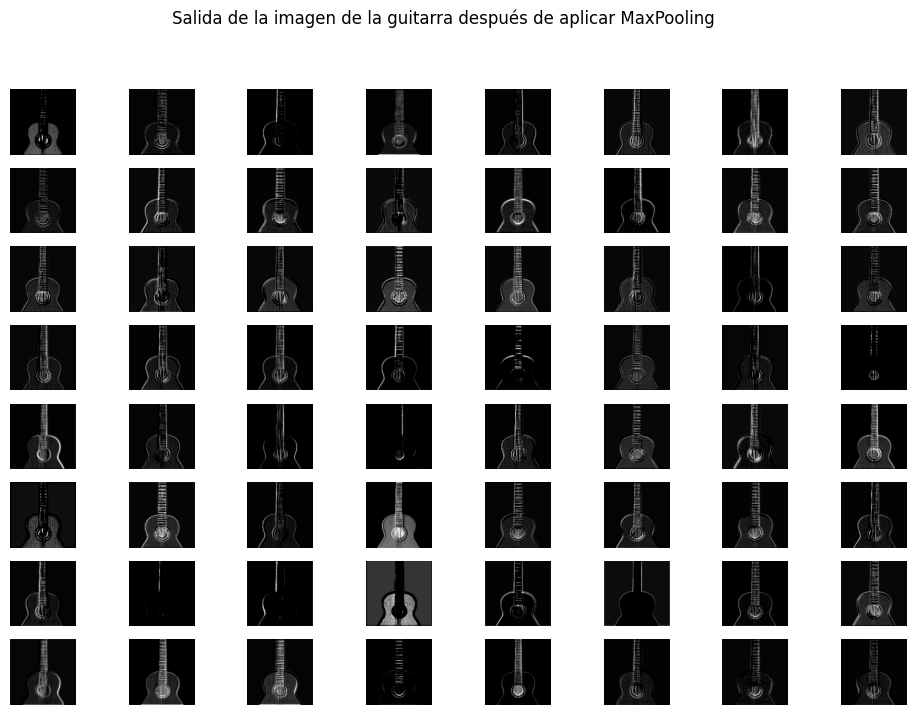

In [ ]:
# Visualizar la salida de la imagen de la guitarra después de aplicar MaxPooling
layer3_output = model.layers[4].output
activation_model3 = keras.models.Model(inputs=model.input, outputs=layer3_output)
activations3 = activation_model3.predict(img_array)

plt.figure(figsize=(12, 8))
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.imshow(activations3[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.suptitle("Salida de la imagen de la guitarra después de aplicar MaxPooling")
plt.show()


1/1 [==============================] - 0s 341ms/step


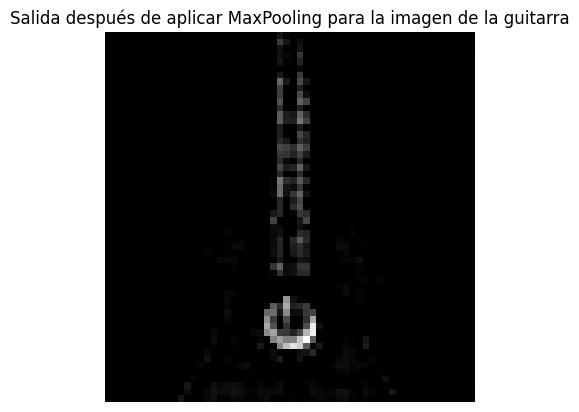

In [ ]:
# Visualizar la salida después de aplicar MaxPooling para la imagen de la guitarra
pooling_output = model.layers[7].output
pooling_model = keras.models.Model(inputs=model.input, outputs=pooling_output)
pooled_output = pooling_model.predict(img_array)

plt.imshow(pooled_output[0, :, :, 0], cmap='gray')
plt.title("Salida después de aplicar MaxPooling para la imagen de la guitarra")
plt.axis('off')
plt.show()


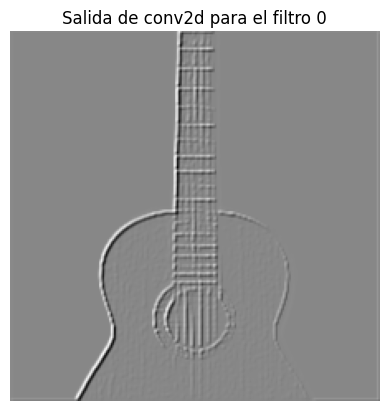

In [ ]:
from scipy.signal import convolve2d

# Corroborar manualmente la salida de conv2d para el filtro 0 del punto b
filter_0_weights = layer_1.get_weights()[0][:, :, :, 0]
conv_output = np.zeros_like(activations1[0, :, :, 0])

for i in range(filter_0_weights.shape[2]):
    conv_output += convolve2d(np.squeeze(activations1[0, :, :, i]), np.squeeze(filter_0_weights[:, :, i]), mode='same')

plt.imshow(conv_output, cmap='gray')
plt.axis('off')
plt.title("Salida de conv2d para el filtro 0")
plt.show()


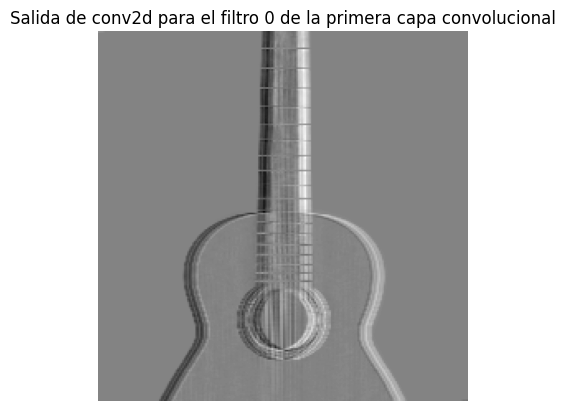

In [ ]:
# Corroborar manualmente la salida de conv2d para el filtro 0 de la primera capa convolucional
filter_weights = model.layers[1].get_weights()[0][:, :, :, 0]
filter_output = np.zeros_like(img_array[0, :, :, 0])
for i in range(filter_weights.shape[2]):
    filter_output += np.convolve(img_array[0, :, :, i].flatten(), filter_weights[:, :, i].flatten(), mode='same').reshape(filter_output.shape)

plt.imshow(filter_output, cmap='gray')
plt.title("Salida de conv2d para el filtro 0 de la primera capa convolucional")
plt.axis('off')
plt.show()


# **Imagen 2**

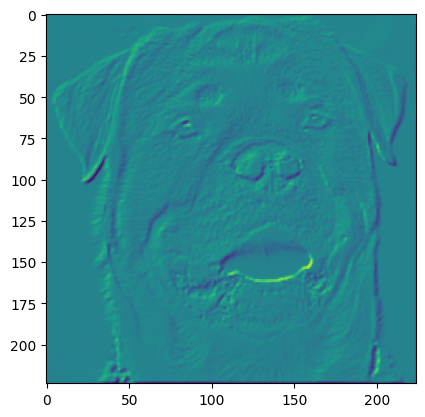

In [ ]:
plt.imshow(layer_1.convolution_op(inputs=img_array2, kernel=layer_1.get_weights()[0])[0][:, :, 0])


1/1 [==============================] - 0s 50ms/step


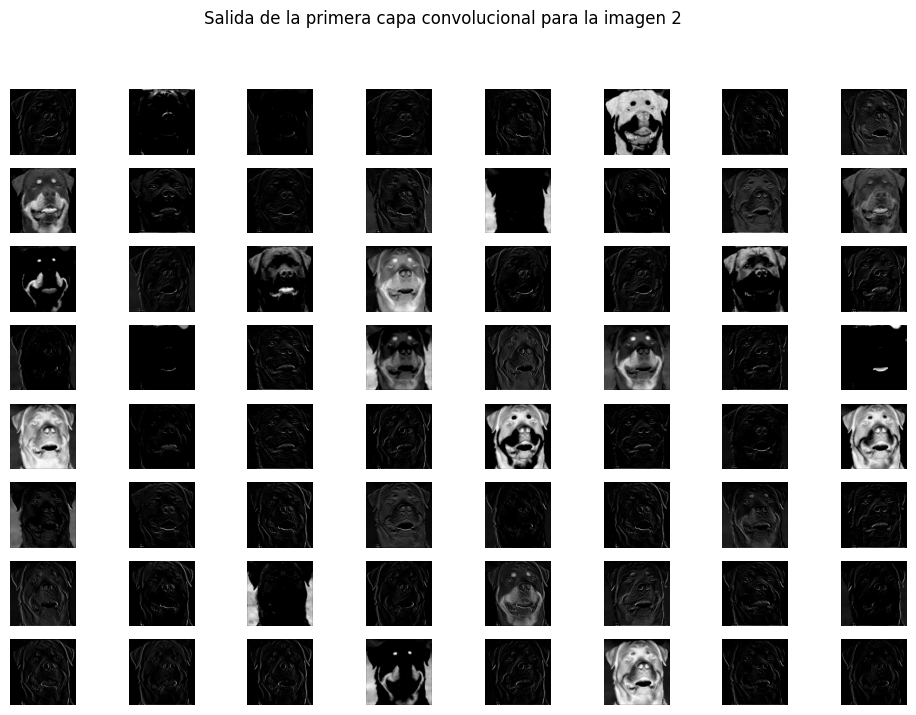

In [ ]:
# Visualizar la salida de la primera capa convolucional para la imagen 2
activations1_2 = activation_model1.predict(img_array2)

plt.figure(figsize=(12, 8))
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.imshow(activations1_2[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.suptitle("Salida de la primera capa convolucional para la imagen 2")
plt.show()


1/1 [==============================] - 0s 115ms/step


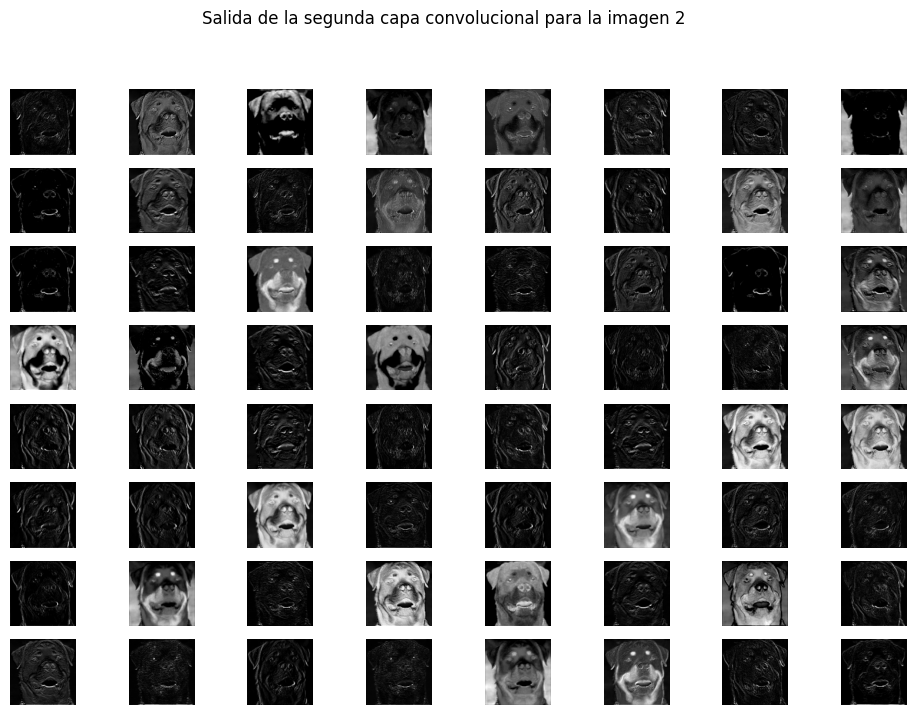

In [ ]:
# Visualizar la salida de la segunda capa convolucional para la imagen 2
activations2_2 = activation_model2.predict(img_array2)

plt.figure(figsize=(12, 8))
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.imshow(activations2_2[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.suptitle("Salida de la segunda capa convolucional para la imagen 2")
plt.show()

1/1 [==============================] - 0s 265ms/step


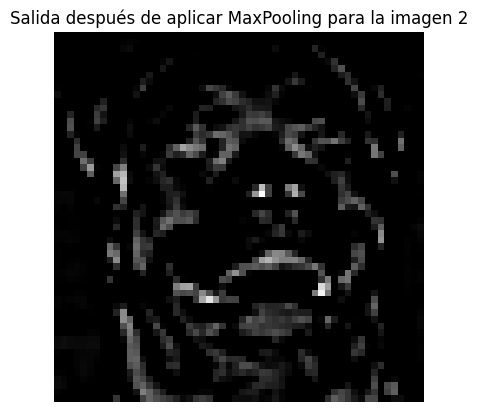

In [ ]:
# Visualizar la salida después de aplicar MaxPooling para la imagen 2
pooled_output_2 = pooling_model.predict(img_array2)

plt.imshow(pooled_output_2[0, :, :, 0], cmap='gray')
plt.title("Salida después de aplicar MaxPooling para la imagen 2")
plt.axis('off')
plt.show()

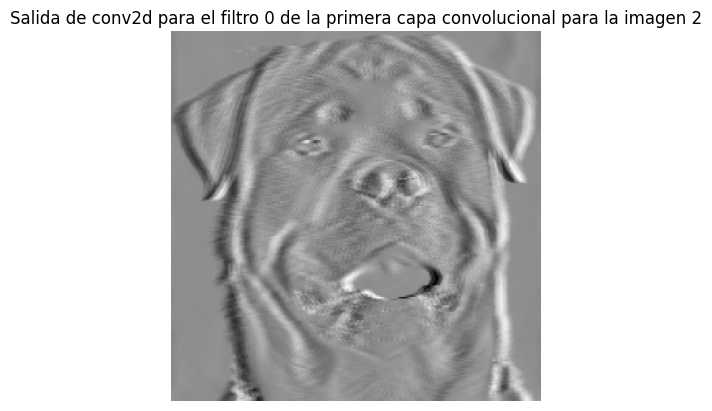

In [ ]:
# Corroborar manualmente la salida de conv2d para el filtro 0 de la primera capa convolucional para la imagen 2
filter_output_2 = np.zeros_like(img_array2[0, :, :, 0])
for i in range(filter_weights.shape[2]):
    filter_output_2 += np.convolve(img_array2[0, :, :, i].flatten(), filter_weights[:, :, i].flatten(), mode='same').reshape(filter_output_2.shape)

plt.imshow(filter_output_2, cmap='gray')
plt.title("Salida de conv2d para el filtro 0 de la primera capa convolucional para la imagen 2")
plt.axis('off')
plt.show()

# **Imagen 3**

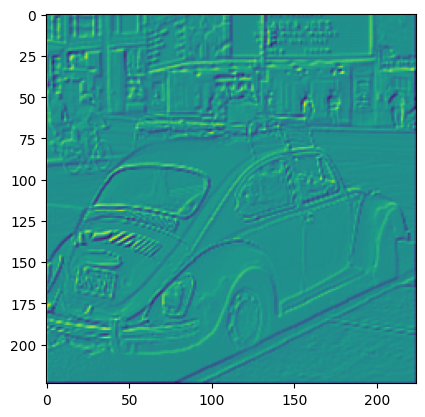

In [ ]:
plt.imshow(layer_1.convolution_op(inputs=img_array3, kernel=layer_1.get_weights()[0])[0][:, :, 0])

1/1 [==============================] - 0s 83ms/step


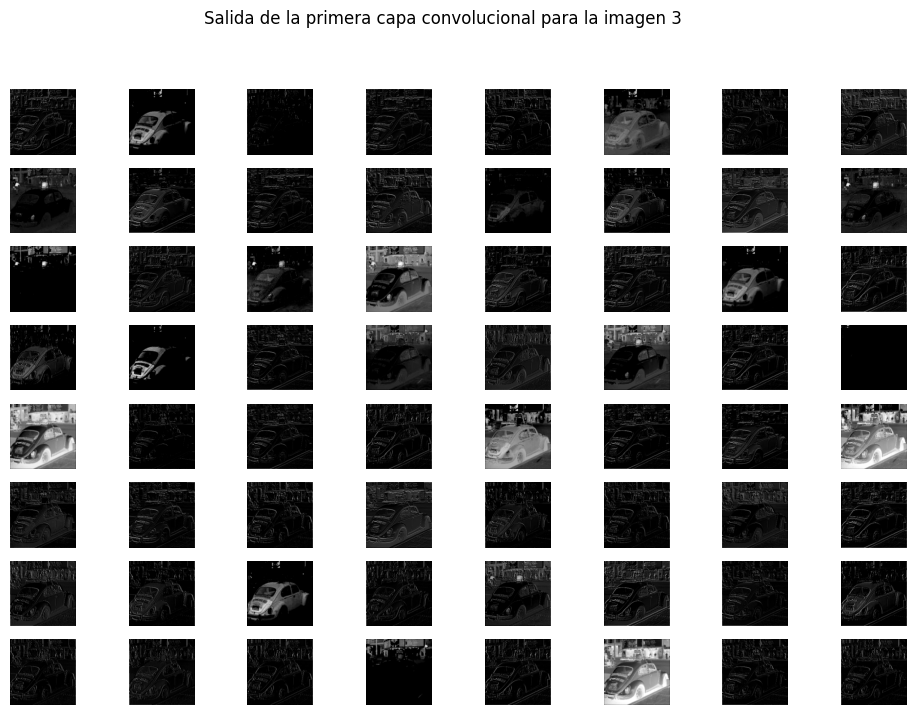

In [ ]:
# Visualizar la salida de la primera capa convolucional para la imagen 3
activations1_3 = activation_model1.predict(img_array3)

plt.figure(figsize=(12, 8))
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.imshow(activations1_3[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.suptitle("Salida de la primera capa convolucional para la imagen 3")
plt.show()

1/1 [==============================] - 0s 345ms/step


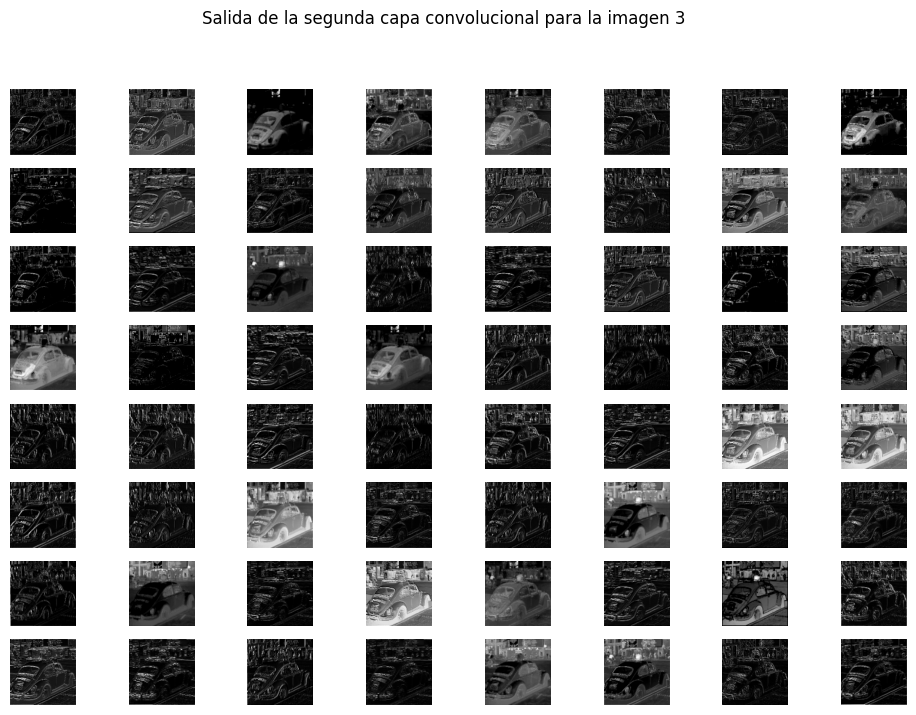

In [ ]:
# Visualizar la salida de la segunda capa convolucional para la imagen 3
activations2_3 = activation_model2.predict(img_array3)

plt.figure(figsize=(12, 8))
for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.imshow(activations2_3[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.suptitle("Salida de la segunda capa convolucional para la imagen 3")
plt.show()

1/1 [==============================] - 0s 266ms/step


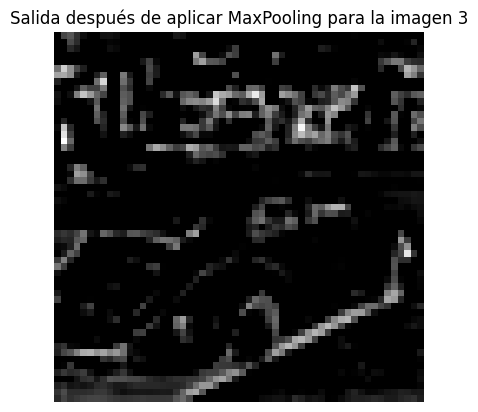

In [ ]:
# Visualizar la salida después de aplicar MaxPooling para la imagen 3
pooled_output_3 = pooling_model.predict(img_array3)

plt.imshow(pooled_output_3[0, :, :, 0], cmap='gray')
plt.title("Salida después de aplicar MaxPooling para la imagen 3")
plt.axis('off')
plt.show()

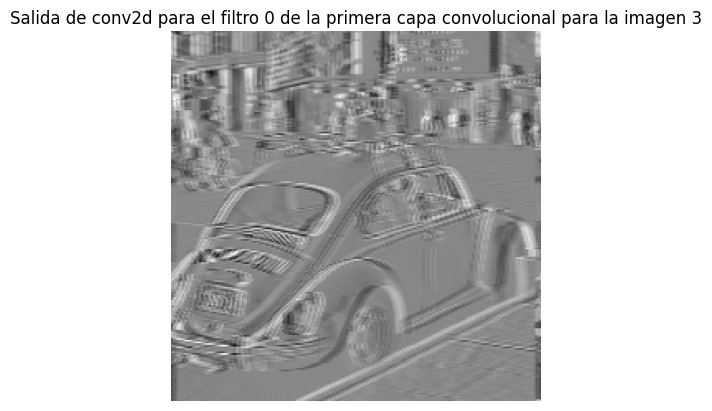

In [ ]:
# Corroborar manualmente la salida de conv2d para el filtro 0 de la primera capa convolucional para la imagen 3
filter_output_3 = np.zeros_like(img_array3[0, :, :, 0])
for i in range(filter_weights.shape[2]):
    filter_output_3 += np.convolve(img_array3[0, :, :, i].flatten(), filter_weights[:, :, i].flatten(), mode='same').reshape(filter_output_3.shape)

plt.imshow(filter_output_3, cmap='gray')
plt.title("Salida de conv2d para el filtro 0 de la primera capa convolucional para la imagen 3")
plt.axis('off')
plt.show()